## Should We Trust that Hiking Trail Rating?

## Contributors:
- Ahmed Al Ayoubi
- Chris Kirchberg
- Harlan Kefalas

## Motivation and Dataset:
When looking for hikes, sometimes the rating and difficulty specified at websites do not always seem to meet expectations of those who hike the trail of interest.

Taking a look a various websites, we settled on using https://www.hikingproject.com to scrape information from hikes in the state of Colorado. Currently the site lists 5,855 trails in that state which are curated by staff or contibutors. Other sites like www.alltrails.com look like they would be good sites but have web scraping prevention tools in place which makes it difficult to extract information.

## Task Definition/Research Question:
As a prospective hiker of a trail, questions come to mind before choosing that trail to hike:

- Does the ratings/difficulty stated by the reviewers match that of the currated trail?
- Is there other information about the trail that might give us a better idea as what the trail should be rated?
- Is there information that might corroborate the trails difficulty/rating either by the currator or the reviewers?

Answers to these questions could possibly be gleaned by scraping data from website like https://www.hikingproject.com, cleaned and then explored by visualizations and simple summary statistics. This project seeks out to explore some possible answers and directions to these questions.



## Literature Review:
Upon searching the web for similar types of tasks, APIs, or others who have attempted something similar, we ran accross this GitHub page: https://github.com/oschow/take-a-hike

It used packages like Selenium, MongoDB, Pandas, sklearn and other resources to scrape infromation from www.alltrails.com, model, visualize and create a Hike Recommendation web app to find hikes that are similar to the hikers interests or whims.

This seemed like a good start to try our hand at exploring ratings...until we ran into blocks in web scrapping AllTrails.com...and so our journey began.

## Data Cleaning:
Insert Steps and Findings here. Possibly some summary stats and data types

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice

# Read the hiking dataset pickle file  
df = pd.read_pickle("hike_project.pkl")  

df.sample(5)

,Trail Name,Trail Length,Trail Difficulty,Trail Rating,User Rate Number,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.
319,Hogback Ridge Trail,1.8,[INTERMEDIATE\n 3.5 (4)\nAreas\nCO\nFront Rang...,[ 3.5 (4)],[ 3.5 (4)],Point to Point,675',636',"6,399'","5,725'",14%,41%,"[No Dogs, Views · Wildflowers · Wildlife]",[ 3.5 from 4 votes\n5 Star\n0%\n4 Star\n50%\n...
1080,Utility Area Access Trail,2.1,[INTERMEDIATE\n 3.0 (2)\nAreas\nCO\nFront Rang...,[ 3.0 (2)],[ 3.0 (2)],Point to Point,657',258',"8,380'","7,874'",8%,31%,"[No Dogs, Birding · Fall Colors · River/Creek ...",[ 3.0 from 2 votes\n5 Star\n0%\n4 Star\n0%\n3...
1486,Utility Area Access Trail,2.1,[INTERMEDIATE\n 3.0 (2)\nAreas\nCO\nFront Rang...,[ 3.0 (2)],[ 3.0 (2)],Point to Point,657',258',"8,380'","7,874'",8%,31%,"[No Dogs, Birding · Fall Colors · River/Creek ...",[ 3.0 from 2 votes\n5 Star\n0%\n4 Star\n0%\n3...
2709,Centennial Trail,1.0,[EASY\n 2.0 (1)\nAreas\nCO\nFront Range\nBoulder],[ 2.0 (1)],[ 2.0 (1)],Point to Point,13',16',"5,271'","5,260'",1%,2%,[Off-leash],[ 2.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...
1699,Boulder Creek Path,8.2,[EASY/INTERMEDIATE\n 3.9 (12)\nAreas\nCO\nFron...,[ 3.9 (12)],[ 3.9 (12)],Point to Point,53',559',"5,741'","5,193'",1%,10%,"[Leashed, Birding · Fall Colors · River/Creek ...",[ 3.9 from 12 votes\n5 Star\n25%\n4 Star\n42%...


In [44]:
# adding State, City, Area and Site 
df['State'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[3])
df['City'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[4])
df['Area'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[5] if len(x[0].split('\n')) > 5 else np.nan)
df['Site'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[6] if len(x[0].split('\n')) > 6 else np.nan)

# Specify the desired order of columns
columns = df.columns.tolist()
columns.remove('State')
columns.remove('City')
columns.remove('Area')
columns.remove('Site')
columns = columns[:1] + ['State'] + ['City'] + ['Area'] + ['Site'] + columns[1:]
df = df[columns]

df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Trail Rating,User Rate Number,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.
207,CR 83J,CO,Front Range,Boulder,NaN,2.0,[INTERMEDIATE\n 3.0 (1)\nAreas\nCO\nFront Rang...,[ 3.0 (1)],[ 3.0 (1)],Point to Point,50',436',"7,515'","7,121'",5%,12%,"[Unknown, Fall Colors · Views]",[ 3.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...
1002,Chapman Drive,CO,Front Range,Boulder,NaN,2.6,[EASY/INTERMEDIATE\n 4.2 (5)\nAreas\nCO\nFront...,[ 4.2 (5)],[ 4.2 (5)],Point to Point,954',13',"6,746'","5,805'",7%,20%,"[Leashed, Birding · Fall Colors · River/Creek ...",[ 4.2 from 5 votes\n5 Star\n40%\n4 Star\n40%\...
1429,Bear Creek - Greenway Trail Connector,CO,Front Range,Colorado Springs,NaN,0.4,[EASY\nBe the first to rate!\nAreas\nCO\nFront...,[],[],Point to Point,71',13',"6,003'","5,942'",4%,11%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
674,Utility Area Access Trail,CO,Front Range,Rocky Mountain National Park,NaN,2.1,[INTERMEDIATE\n 3.0 (2)\nAreas\nCO\nFront Rang...,[ 3.0 (2)],[ 3.0 (2)],Point to Point,657',258',"8,380'","7,874'",8%,31%,"[No Dogs, Birding · Fall Colors · River/Creek ...",[ 3.0 from 2 votes\n5 Star\n0%\n4 Star\n0%\n3...
2061,Bobolink Trail,CO,Front Range,Boulder,NaN,0.5,[EASY\n 3.5 (2)\nAreas\nCO\nFront Range\nBoulder],[ 3.5 (2)],[ 3.5 (2)],Point to Point,22',0',"5,304'","5,281'",1%,2%,"[Off-leash, River/Creek · Views · Wildflowers]",[ 3.5 from 2 votes\n5 Star\n0%\n4 Star\n50%\n...


In [45]:
# Cleaning Trail rating, User rate number, and renaming User rate number to user review 
if not np.issubdtype(df['Trail Rating'].dtype, np.dtype(str).type):
    df['Trail Rating'] = df['Trail Rating'].astype(str)
df['Trail Rating'] = pd.to_numeric(df['Trail Rating'].str.extract('(\d+\.\d+)')[0], errors='coerce')

if not np.issubdtype(df['User Rate Number'].dtype, np.dtype(str).type):
    df['User Rate Number'] = df['User Rate Number'].astype(str)
df['User Rate Number'] = df['User Rate Number'].str.extract('\((\d+)\)')[0]

df = df.rename(columns={'User Rate Number': 'User Review'})


# Cleaninbg Trail Difficulty and mappping difficulty number 
df['Trail Difficulty'] = df['Trail Difficulty'].apply(lambda x: x[0].split()[0])

# Difficulty mapping
difficulty_map = {
    'EASY': 1,
    'EASY/INTERMEDIATE': 2,
    'INTERMEDIATE': 3,
    'INTERMEDIATE/DIFFICULT': 4,
    'DIFFICULT': 5
}

# Create and sort the Difficulty Number column 
df['Difficulty Number'] = df['Trail Difficulty'].map(difficulty_map)

columns = df.columns.tolist()
columns.remove('Difficulty Number')
columns = columns[:7] + ['Difficulty Number'] + columns[7:]
df = df[columns]

# Cleaning Dog and Features, and sort columns 
df['Features'] = df['Dogs and Features'].apply(lambda x: x[1] if len(x) > 1 else np.nan)

columns = df.columns.tolist()
columns.remove('Features')
columns = columns[:18] + ['Features'] + columns[18:]
df = df[columns]

df['Dogs and Features'] = df['Dogs and Features'].apply(lambda x: x[0].split()[0])
df['Dogs and Features'] = df['Dogs and Features'].replace("Unknown", np.nan)
df = df.rename(columns={'Dogs and Features': 'Dogs'})


df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Difficulty Number,Trail Rating,User Review,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs,Features,Stats Info.
1439,Red Mesa Loop,CO,Front Range,Ken Caryl,Deer Creek Canyon Park,2.5,INTERMEDIATE,3,3.8,9,Loop,368',373',"7,425'","7,085'",6%,18%,Leashed,Views,[ 3.8 from 9 votes\n5 Star\n11%\n4 Star\n67%\...
1240,Foothills Path,CO,Front Range,Boulder,NaN,4.1,EASY,1,2.0,1,Point to Point,50',116',"5,352'","5,236'",1%,4%,Leashed,NaN,[ 2.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...
305,South Boulder Creek Trail,CO,Front Range,Boulder,NaN,3.4,EASY,1,3.8,5,Point to Point,159',7',"5,432'","5,280'",1%,2%,Leashed,Birding · Fall Colors · River/Creek · Views · ...,[ 3.8 from 5 votes\n5 Star\n0%\n4 Star\n80%\n...
1478,Foothills North Trail,CO,Front Range,Boulder,NaN,1.2,INTERMEDIATE/DIFFICULT,4,2.7,3,Point to Point,174',91',"5,724'","5,550'",4%,16%,Off-leash,Views · Wildflowers · Wildlife,[ 2.7 from 3 votes\n5 Star\n0%\n4 Star\n0%\n3...
1980,Piney Creek Trail,CO,Front Range,NaN,NaN,9.5,EASY,1,3.0,2,Point to Point,67',442',"5,996'","5,618'",1%,6%,NaN,NaN,[ 3.0 from 2 votes\n5 Star\n0%\n4 Star\n50%\n...


In [46]:
# Splitting Features Contains into separate Columns
all_features = ['Birding', 'Fall Colors', 'River/Creek', 'Views', 'Wildflowers', 'Spring',
                  'Geological Significance', 'Swimming', 'Lake', 'Wildlife']
for i in all_features:
    df[i] = df['Features'].str.contains(i)

# Replacing all Features NaN values with False 
df['Birding'] = df['Birding'].fillna(False)
df['Fall Colors'] = df['Fall Colors'].fillna(False)
df['River/Creek'] = df['River/Creek'].fillna(False)
df['Views'] = df['Views'].fillna(False)
df['Wildflowers'] = df['Wildflowers'].fillna(False)
df['Wildlife'] = df['Wildlife'].fillna(False)
df['Spring'] = df['Spring'].fillna(False)
df['Geological Significance'] = df['Geological Significance'].fillna(False)
df['Swimming'] = df['Swimming'].fillna(False)
df['Lake'] = df['Lake'].fillna(False)
   
df.iloc[:,18:].sample(5)

,Features,Stats Info.,Birding,Fall Colors,River/Creek,Views,Wildflowers,Spring,Geological Significance,Swimming,Lake,Wildlife
3068,NaN,[ 3.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...,False,False,False,False,False,False,False,False,False,False
1424,River/Creek · Wildflowers,[ 2.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...,False,False,True,False,True,False,False,False,False,False
1692,Birding · River/Creek · Views · Wildflowers · ...,[ 4.4 from 17 votes\n5 Star\n47%\n4 Star\n41%...,True,False,True,True,True,False,False,False,False,True
1474,Birding · Fall Colors · River/Creek · Views · ...,[ 3.2 from 5 votes\n5 Star\n40%\n4 Star\n0%\n...,True,True,True,True,True,False,False,False,False,True
2739,Views,[ 3.6 from 5 votes\n5 Star\n40%\n4 Star\n0%\n...,False,False,False,True,False,False,False,False,False,False


In [47]:
#Dropping Stats info. and Features columns
df.drop(columns='Stats Info.', inplace=True)
#df.drop(columns='Features', inplace=True)

#df.sample(5)

In [48]:
# Showing Datatypes 
df.dtypes

Trail Name                  object
State                       object
City                        object
Area                        object
Site                        object
Trail Length                object
Trail Difficulty            object
Difficulty Number            int64
Trail Rating               float64
User Review                 object
Trail Type                  object
Elev_Up                     object
Elev_Down                   object
Highest Elevation           object
Lowest Elevation            object
Average Grade               object
Max Grade                   object
Dogs                        object
Features                    object
Birding                       bool
Fall Colors                   bool
River/Creek                   bool
Views                         bool
Wildflowers                   bool
Spring                        bool
Geological Significance       bool
Swimming                      bool
Lake                          bool
Wildlife            

In [49]:
# Correcting DataTypes 
df['Trail Length'] = df['Trail Length'].astype(float)
df['Elev_Up'] = df['Elev_Up'].str.replace("'", "").str.replace(",", "").astype(float)
df['Elev_Down'] = df['Elev_Down'].str.replace("'", "").str.replace(",", "").astype(float)
df['Highest Elevation'] = df['Highest Elevation'].str.replace("'", "").str.replace(",", "").astype(float)
df['Lowest Elevation'] = df['Lowest Elevation'].str.replace("'", "").str.replace(",", "").astype(float)
df['Average Grade'] = df['Average Grade'].str.strip('%').astype(float) / 100
df['Max Grade'] = df['Max Grade'].str.strip('%').astype(float) / 100
df['User Review'] = df['User Review'].astype("Int64")

df.dtypes

Trail Name                  object
State                       object
City                        object
Area                        object
Site                        object
Trail Length               float64
Trail Difficulty            object
Difficulty Number            int64
Trail Rating               float64
User Review                  Int64
Trail Type                  object
Elev_Up                    float64
Elev_Down                  float64
Highest Elevation          float64
Lowest Elevation           float64
Average Grade              float64
Max Grade                  float64
Dogs                        object
Features                    object
Birding                       bool
Fall Colors                   bool
River/Creek                   bool
Views                         bool
Wildflowers                   bool
Spring                        bool
Geological Significance       bool
Swimming                      bool
Lake                          bool
Wildlife            

## Visualizations:
Insert types of visualizaitons and why. What can we get out of it. Distributions on each feature/variable. Plot of difficulty vs. user entered difficulty. Plotting different variables/features vs. average rating. Save more difficulty level. Distribution of ratings (use a heatmap and cluster using Seaborn). Try multple regression of features to see what might impact rating the most (not a predicite model, but a descriptive model).

In [53]:
# Get basic information about the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Trail Name               3364 non-null   object  
 1   State                    3364 non-null   object  
 2   City                     3364 non-null   object  
 3   Area                     2610 non-null   object  
 4   Site                     232 non-null    object  
 5   Trail Length             3364 non-null   float64 
 6   Trail Difficulty         3364 non-null   object  
 7   Difficulty Number        3364 non-null   category
 8   Trail Rating             2958 non-null   float64 
 9   User Review              2958 non-null   Int64   
 10  Trail Type               3364 non-null   object  
 11  Elev_Up                  3364 non-null   float64 
 12  Elev_Down                3364 non-null   float64 
 13  Highest Elevation        3364 non-null   float64 
 14  Lowest E

,Trail Length,Trail Rating,User Review,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade
count,3364.000000,2958.000000,2958.0,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000
mean,3.506897,3.368627,3.980392,565.637931,349.931034,6810.465517,6293.258621,0.046034,0.143448
std,4.465425,0.748586,4.056619,1187.185556,842.813708,1974.600376,1396.786628,0.051668,0.148434
min,0.100000,2.000000,1.0,0.000000,0.000000,5135.000000,5044.000000,0.000000,0.010000
25%,1.300000,3.000000,1.0,22.000000,14.000000,5381.000000,5280.000000,0.010000,0.030000
50%,2.000000,3.500000,2.0,72.500000,92.000000,5999.500000,5696.500000,0.020000,0.100000
75%,2.600000,4.000000,5.0,657.000000,346.000000,7132.000000,6771.000000,0.070000,0.190000
max,22.100000,4.700000,19.0,6930.000000,5527.000000,13247.000000,10423.000000,0.280000,0.620000


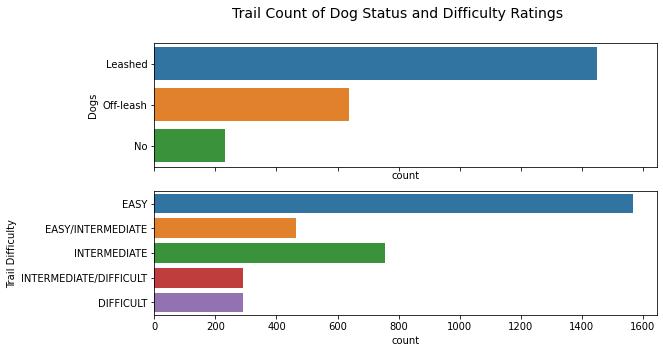

In [54]:
# Plot count data of Dogs and Trail Difficulty on Bar Graphs
plt.rcParams["figure.figsize"] = [9, 5]
fig, axs = plt.subplots(nrows=2,sharex=True)
sns.countplot(y=df['Dogs'],ax=axs[0])

sns.countplot(y=df['Trail Difficulty'],
               order=['EASY', 'EASY/INTERMEDIATE', 'INTERMEDIATE',
                      'INTERMEDIATE/DIFFICULT', 'DIFFICULT'],ax=axs[1])
fig.suptitle('Trail Count of Dog Status and Difficulty Ratings', fontsize=14)

plt.show()

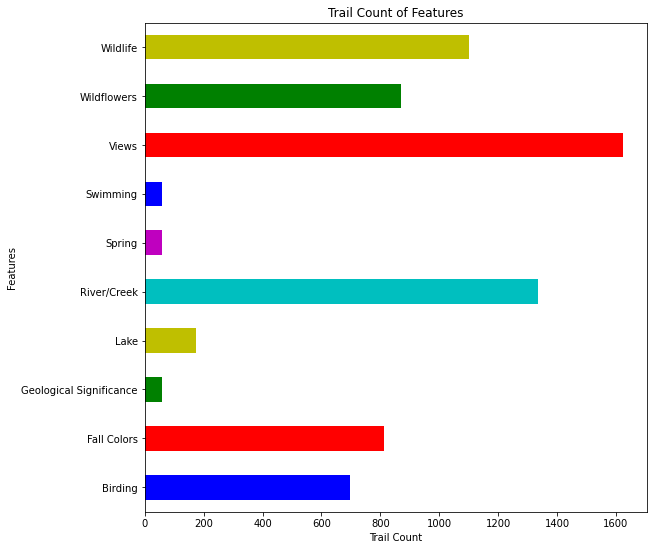

In [55]:
# Plot count data of Features on Bar Graphs
plt.rcParams["figure.figsize"] = [9, 9]
ax = plt.GridSpec(1, 1)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm']), None, len(df)))
ax = feats.plot.barh(color=my_colors)
plt.xlabel('Trail Count')
plt.ylabel('Features')
plt.title('Trail Count of Features')
plt.show()

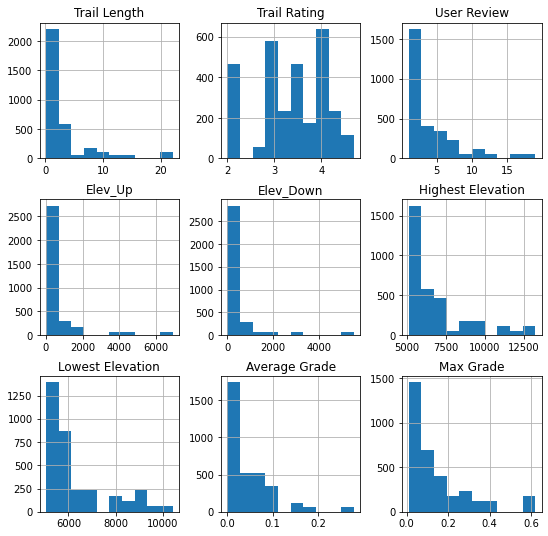

In [56]:
# Plot count data of numeric columns on Histograms
plt.rcParams["figure.figsize"] = [9, 9]
df[df.columns[~df.columns.isin(feats_name)]].hist()
plt.show()

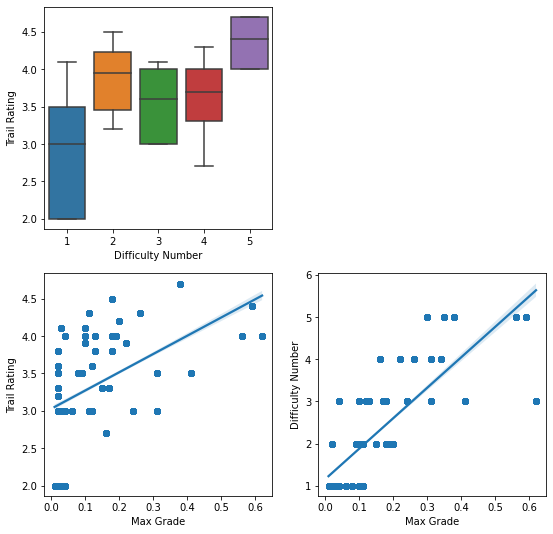

In [ ]:
# Plot Box Plot for Difficulty Number vs. Trail Rating
ax = plt.GridSpec(2, 2)
plt.rcParams["figure.figsize"] = [9, 9]
ax1 = plt.subplot(ax[0, 0])
sns.boxplot(x='Difficulty Number', y='Trail Rating', data=df)

# Plot regression lines and scatter plots for Max Grade vs.
# Difficulty Number and Trail Rating
ax2 = plt.subplot(ax[1, 1])
sns.regplot(x='Max Grade', y='Difficulty Number', data=df, dropna=True)

ax3 = plt.subplot(ax[1, 0])
sns.regplot(x='Max Grade', y='Trail Rating', data=df, dropna=True)
plt.show()